In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

eco_file = pd.read_csv("../__data__/ecommerce_sales.csv")

eco_file.head()

,order_id,customer_name,country,product,category,price,quantity,total,date
0,1001,Michelle Barnett,India,Sony Headphones,Electronics,228,5,1140,2025-06-04
1,1002,Micheal Byrd,Canada,Data Science Book,Books,136,1,136,2025-04-06
2,1003,James Jordan,USA,Python Book,Books,75,5,375,2025-06-13
3,1004,Noah Mata,Canada,iPhone,Electronics,453,5,2265,2025-06-03
4,1005,Jennifer Miller,India,Data Science Book,Books,10,1,10,2025-04-16


In [24]:
amount_by_day = eco_file.groupby(["country", "date", "category"])["total"].sum().reset_index()
display(amount_by_day)


,country,date,category,total
0,Argentina,2025-03-31,Electronics,30
1,Argentina,2025-04-07,Home,273
2,Argentina,2025-04-08,Books,498
3,Argentina,2025-04-20,Apparel,118
4,Argentina,2025-04-21,Apparel,1812
...,...,...,...,...
93,USA,2025-05-11,Home,760
94,USA,2025-05-21,Electronics,1530
95,USA,2025-05-30,Apparel,1848
96,USA,2025-06-05,Books,995


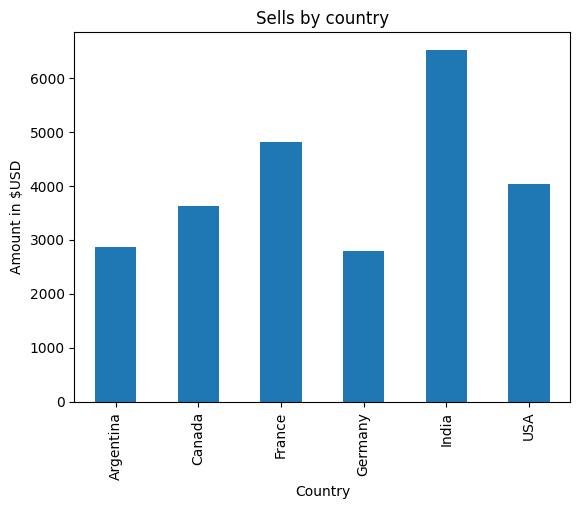

In [17]:
# Bar graph of sells by country
sells_by_country = eco_file.groupby("country")["price"].sum().plot.bar()
plt.title("Sells by country")
plt.xlabel("Country")
plt.ylabel("Amount in $USD")
plt.show()

<Axes: ylabel='Frequency'>

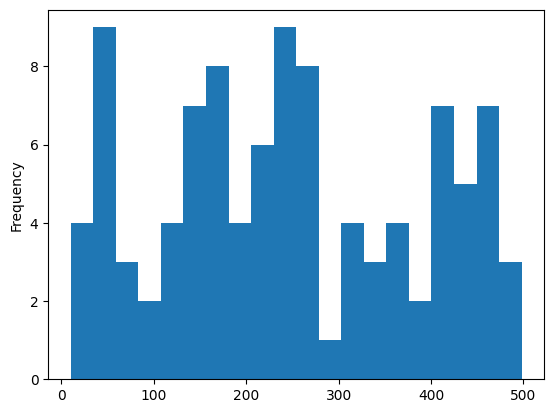

In [23]:
# Histograma de precios
display(eco_file["price"].plot.hist(bins=20))

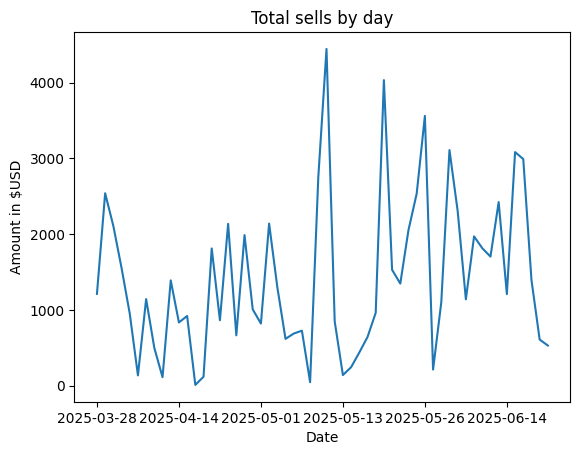

In [27]:
# Sells by day with time series
sells_by_day = eco_file.groupby("date")["total"].sum().plot.line()
plt.title("Total sells by day")
plt.xlabel("Date")
plt.ylabel("Amount in $USD")
plt.show()

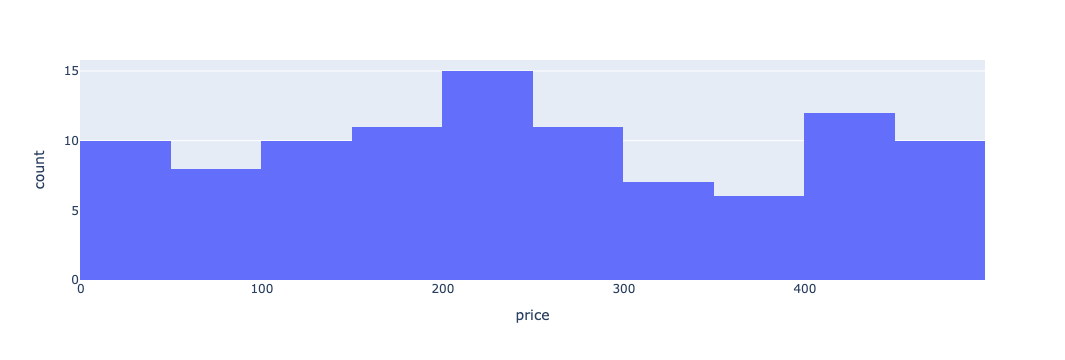

In [29]:
px.histogram(eco_file, x="price")

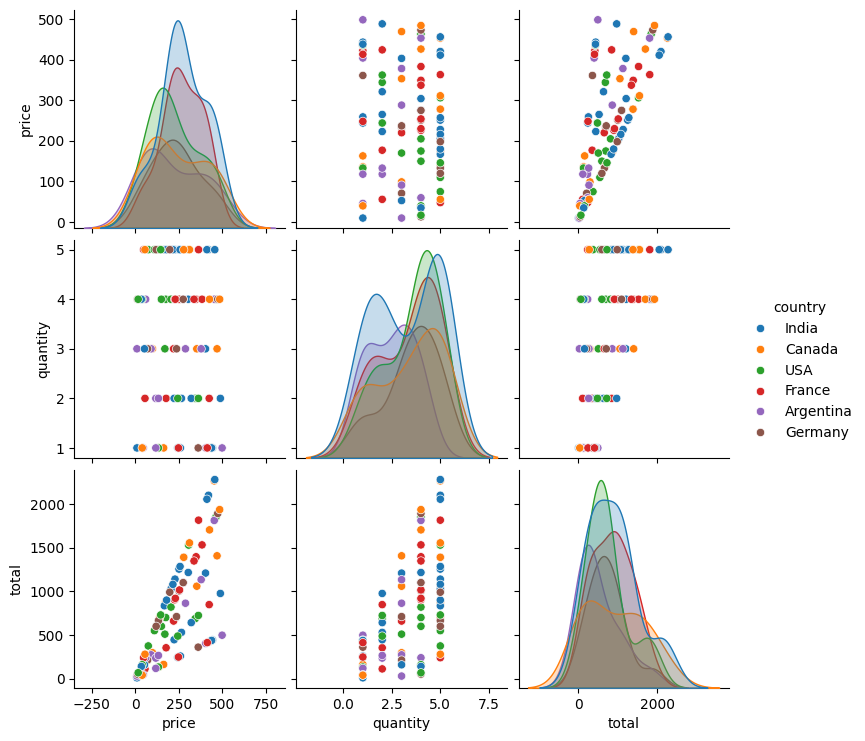

In [32]:
# Pairplot
sns.pairplot(eco_file, vars=["price", "quantity", "total"], hue="country")

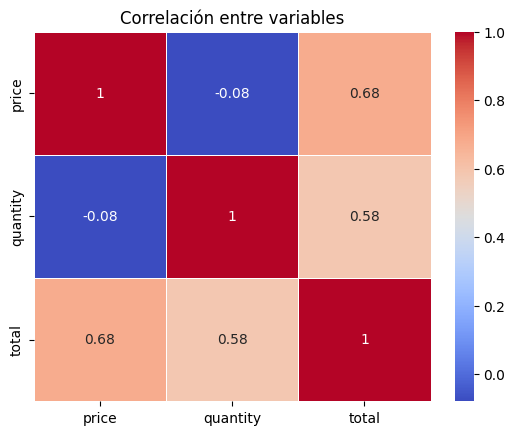

In [33]:
# Heatmap
correlation_matrix = eco_file[["price", "quantity", "total"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación entre variables")
plt.show()